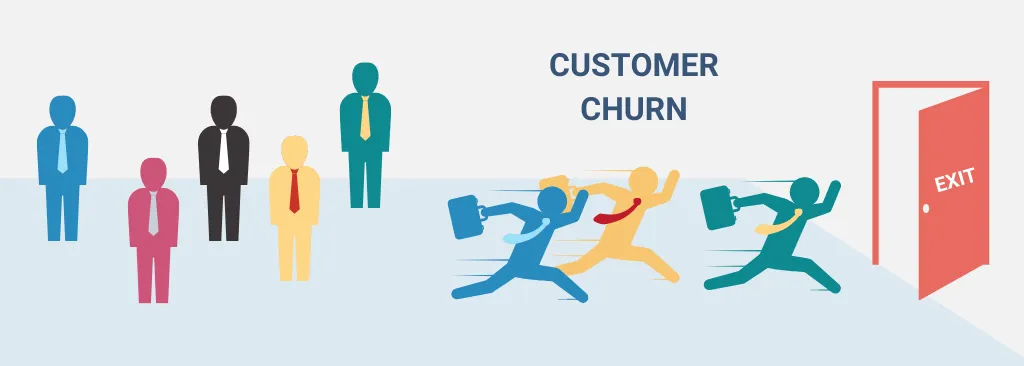

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import warnings
from imblearn.over_sampling import SMOTE
import pickle

warnings.filterwarnings('ignore')


In [2]:
# loading dataset by using try and except
def load_dataset(data):
  try:
    return pd.read_csv(data)
  except:
    return "Invalid file Please check the path or file type"


df_churn = load_dataset('/content/churn_prediction.csv')

# displaying the top 5 rows of the dataset
df_churn.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [3]:
# information about the dataset
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   days_since_last_transaction     25159 non-null  float64
 10  current_balance                 28382 non-null  float64
 11  previous_month_end_balance      28382 non-null  float64
 12  average_monthly_balance_prevQ   

In [4]:
# all columns that are in the dataset
df_churn.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

In [5]:
# shape of the dataset
print("\nDataset Shape:", df_churn.shape)


Dataset Shape: (28382, 21)


In [6]:
#checking for the null values in the dataset
df_churn.isnull().sum()

,0
customer_id,0
vintage,0
age,0
gender,525
dependents,2463
occupation,80
city,803
customer_nw_category,0
branch_code,0
days_since_last_transaction,3223


In [7]:
# checking for the unique values
print(f"Unique values in dependent column {df_churn['dependents'].nunique()}")
print(f"Unique values in Gender column {df_churn['gender'].nunique()}")
print(f"Unique values in occupation column {df_churn['occupation'].nunique()}")
print(f"Unique values in city column {df_churn['city'].nunique()}")


Unique values in dependent column 15
Unique values in Gender column 2
Unique values in occupation column 5
Unique values in city column 1604


In [8]:
# checking for the duplicate values
df_churn.duplicated().sum()

np.int64(0)

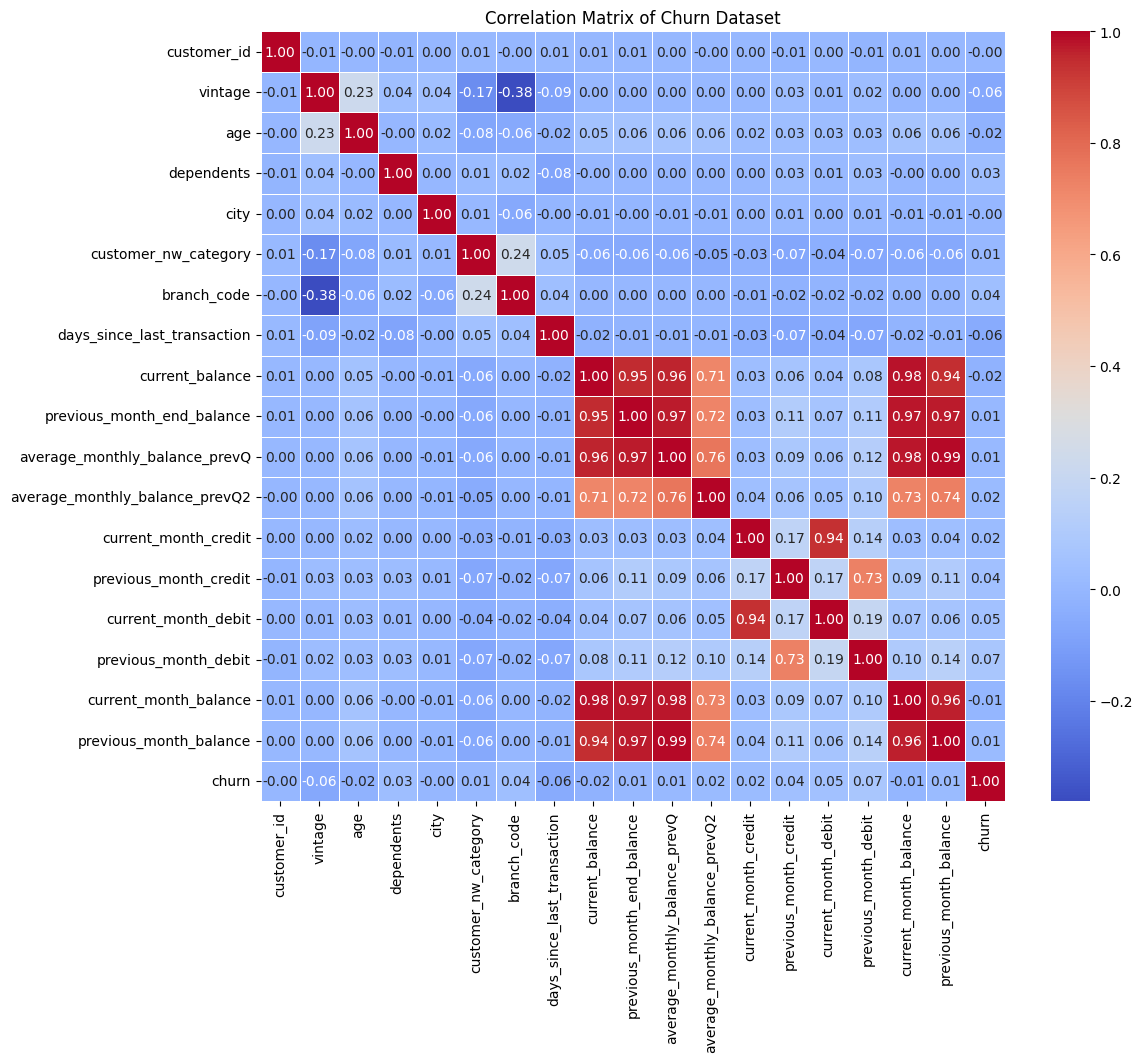

In [9]:
numerical_cols = df_churn.select_dtypes(include=np.number).columns.tolist()

df_churn_corr = df_churn[numerical_cols]


# Calculate the correlation matrix
corr_matrix = df_churn_corr.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10)) # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Churn Dataset')
plt.show()

**As we can see that there are high correlation between some variable so i am going to remove it**

In [10]:
df_churn.drop([
    'customer_id',
    'previous_month_end_balance',
    'average_monthly_balance_prevQ2',
    'previous_month_balance',
    'previous_month_credit',
    'previous_month_debit'
], axis=1, inplace=True)

In [11]:
# summary satatistics
df_churn.describe()

,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,average_monthly_balance_prevQ,current_month_credit,current_month_debit,current_month_balance,churn
count,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.496780e+03,3.433252e+03,3.658745e+03,7.451133e+03,0.185329
std,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.172622e+04,7.707145e+04,5.198542e+04,4.203394e+04,0.388571
min,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,1.428690e+03,1.000000e-02,1.000000e-02,-3.374180e+03,0.000000
25%,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,2.180945e+03,3.100000e-01,4.100000e-01,1.996765e+03,0.000000
50%,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.542865e+03,6.100000e-01,9.193000e+01,3.447995e+03,0.000000
75%,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.666887e+03,7.072725e+02,1.360435e+03,6.667958e+03,0.000000
max,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.700290e+06,1.226985e+07,7.637857e+06,5.778185e+06,1.000000


In [12]:
df_churn[['gender','dependents','occupation','city',"days_since_last_transaction"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       27857 non-null  object 
 1   dependents                   25919 non-null  float64
 2   occupation                   28302 non-null  object 
 3   city                         27579 non-null  float64
 4   days_since_last_transaction  25159 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.1+ MB


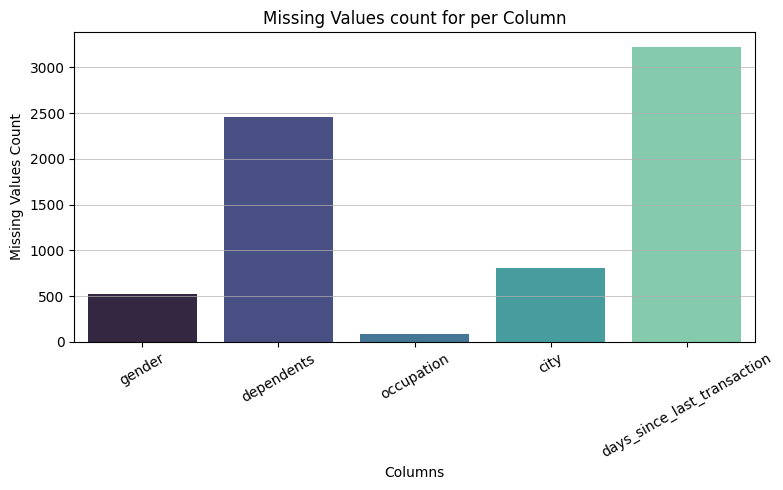

In [13]:
# plot missing values

missing_counts = df_churn[['gender','dependents','occupation','city',"days_since_last_transaction"]].isnull().sum()
missing_counts = missing_counts[missing_counts > 0]
plt.figure(figsize=(8, 5))
sns.barplot(x=missing_counts.index, y=missing_counts.values, palette = 'mako')
plt.title("Missing Values count for per Column")
plt.xlabel("Columns")
plt.ylabel("Missing Values Count")
plt.xticks(rotation=30)
plt.grid(axis ='y', linestyle ='-', linewidth = 0.5)
plt.tight_layout()
plt.show()

# Missing Values Imputation


In [14]:
# imputing missing values

# filling the categorical
df_churn['gender'].fillna(df_churn['gender'].mode()[0], inplace=True)
df_churn['dependents'].fillna(df_churn['dependents'].mode()[0], inplace=True)
df_churn['dependents'] = df_churn["dependents"].round() # rouding the values but its optional

df_churn['occupation'].fillna(df_churn['occupation'].mode()[0], inplace=True)
df_churn['city'].fillna(df_churn['city'].mode()[0], inplace=True)
df_churn['city'] = df_churn['city'].astype(int)

# filling days_since_last_transaction (continuous) with median
df_churn['days_since_last_transaction'].fillna(df_churn['days_since_last_transaction'].mean(), inplace=True)

In [15]:
# validating whether the missing values are impute are not

columns_to_check = ['gender', 'occupation', 'dependents', 'city', 'days_since_last_transaction']
print(df_churn[columns_to_check].isnull().sum())


gender                         0
occupation                     0
dependents                     0
city                           0
days_since_last_transaction    0
dtype: int64


**Now as you can see that there are no missing values in the dataset**

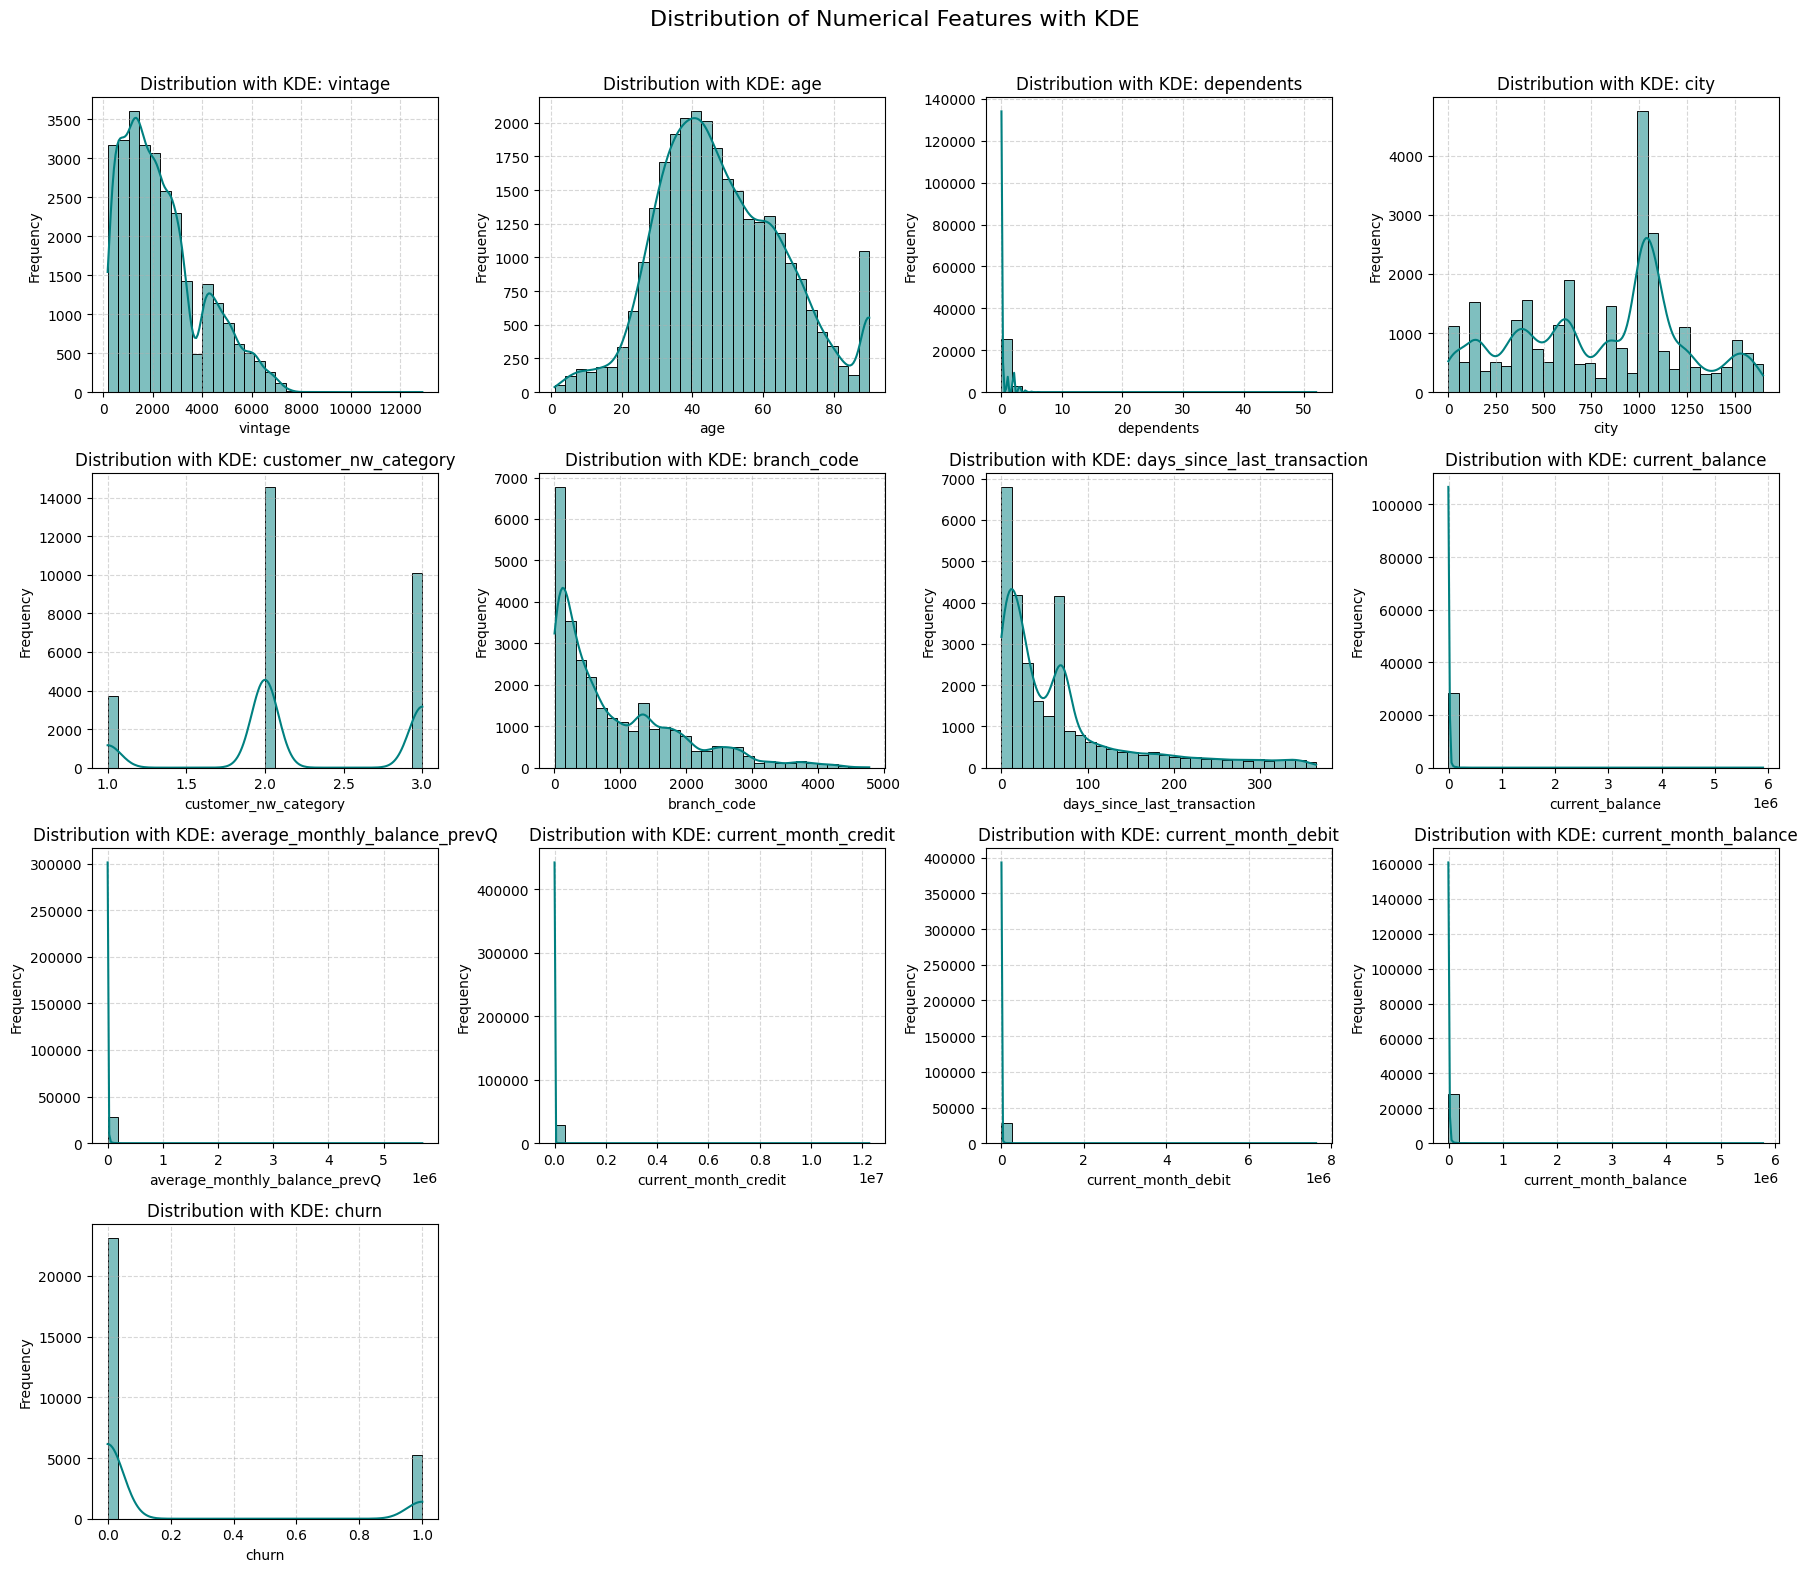

In [16]:
# Selecting numerical columns for distribution plots
numerical_cols = df_churn.select_dtypes(include=np.number).columns.tolist()

# Determine the number of rows needed
n_cols = 4  # number of graphs per row
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

# Plot settings
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df_churn[col].dropna(), bins=30, kde=True, ax=axes[i], color='teal', edgecolor='black')
    axes[i].set_title(f'Distribution with KDE: {col}', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, linestyle='--', alpha=0.5)

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distribution of Numerical Features with KDE", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


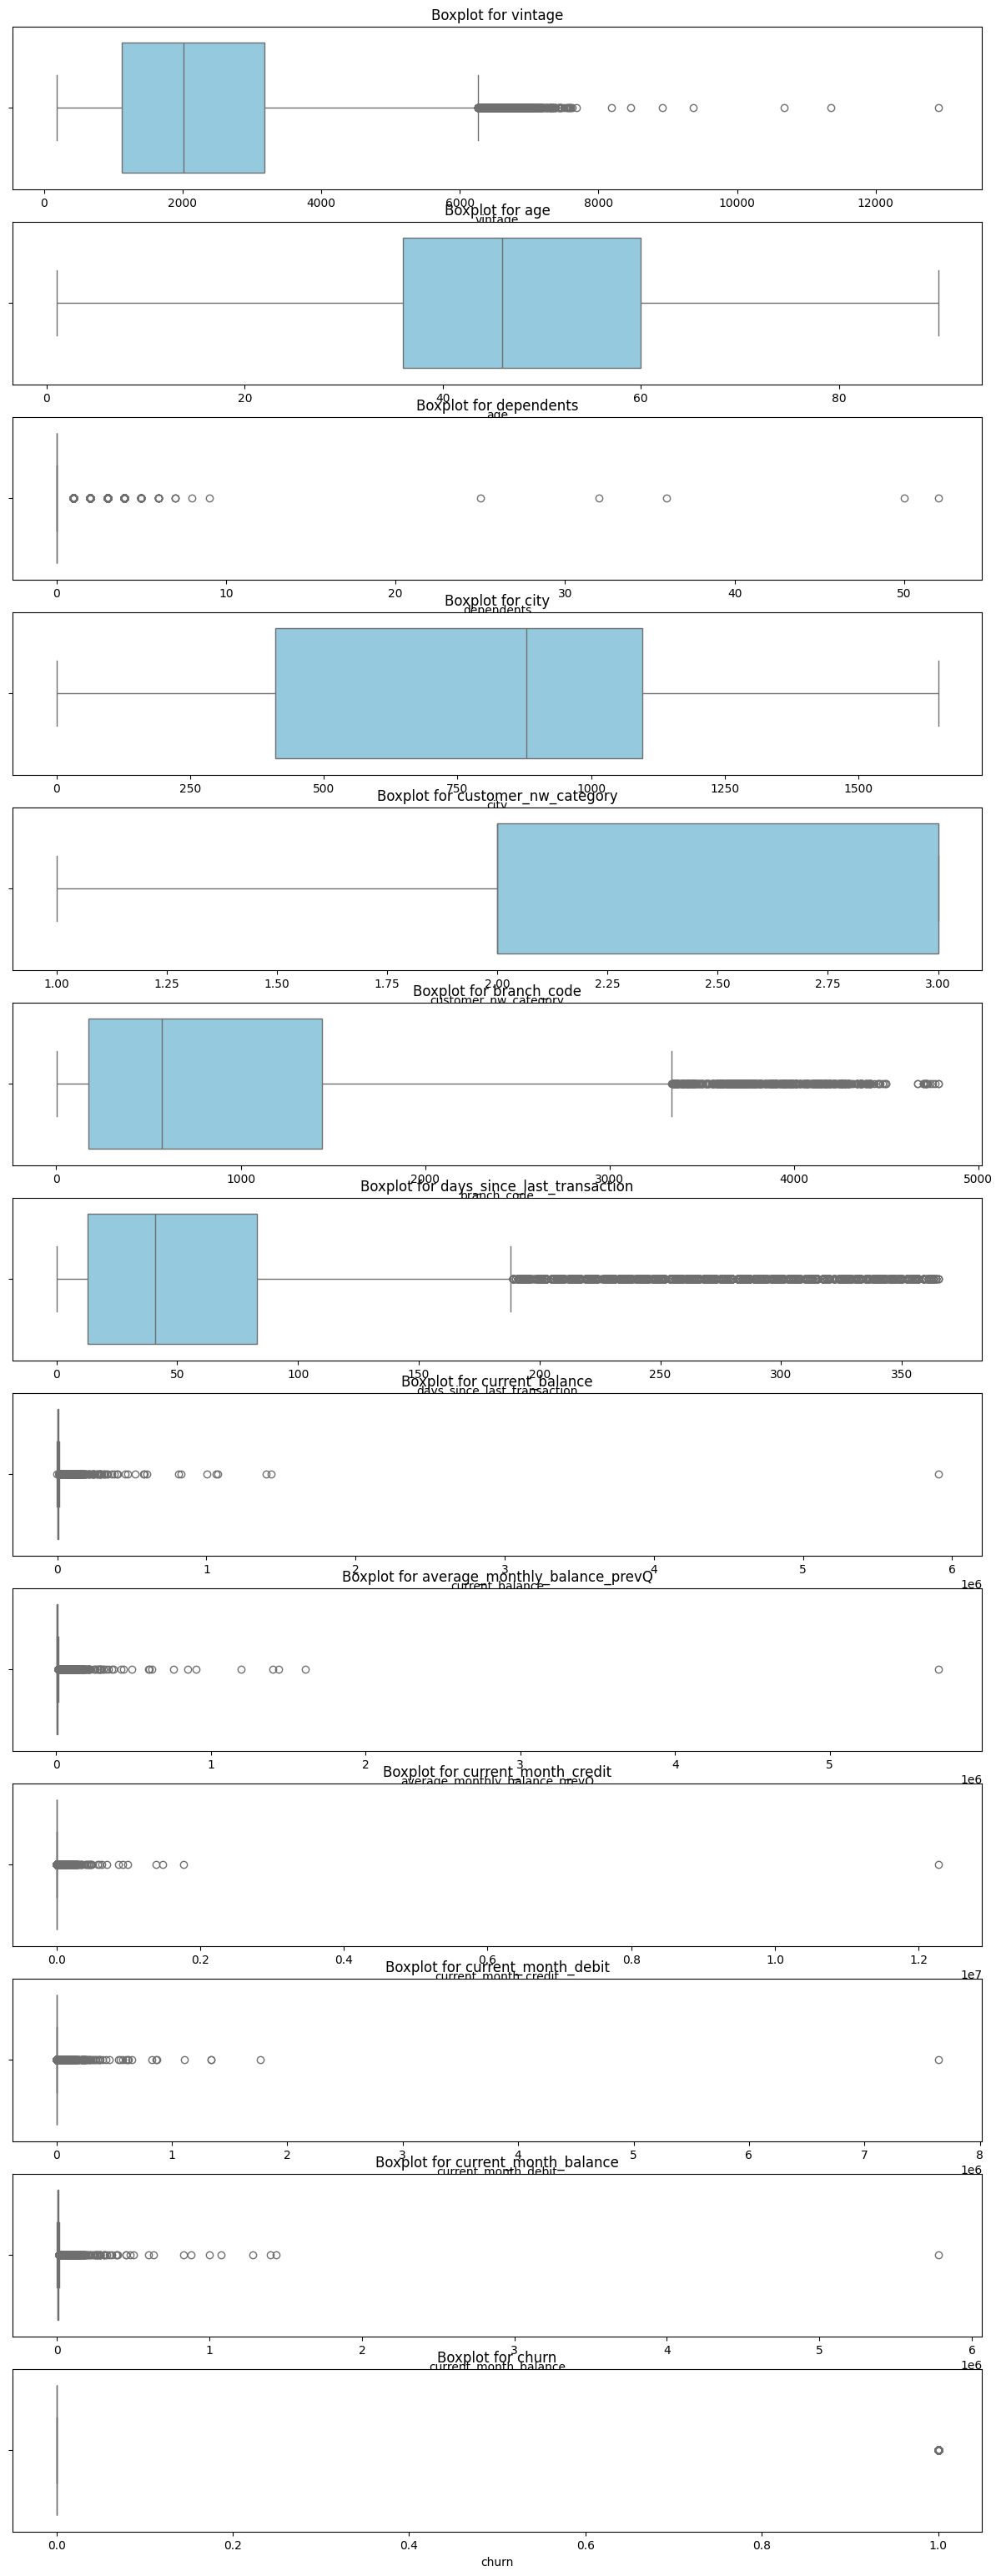

In [17]:
# checking for the outliers
# plot boxplots for each numerical columns
plt.figure(figsize = (15, len(numerical_cols)*3))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(x = df_churn[col], color = 'skyblue')
    plt.title(f'Boxplot for {col}')

plt.show()

**There are too much outliers in the dataset and also skewed data due to the continuous data**

In [18]:
# applying log transformation on continuous data
# apply log1p (log(x+1)) to avoid log(0) error
columns_to_log = [
    'current_balance',
    'current_month_credit',
    'current_month_debit',
    'current_month_balance',
]

for col in columns_to_log:
  df_churn[col] = np.log1p(df_churn[col])


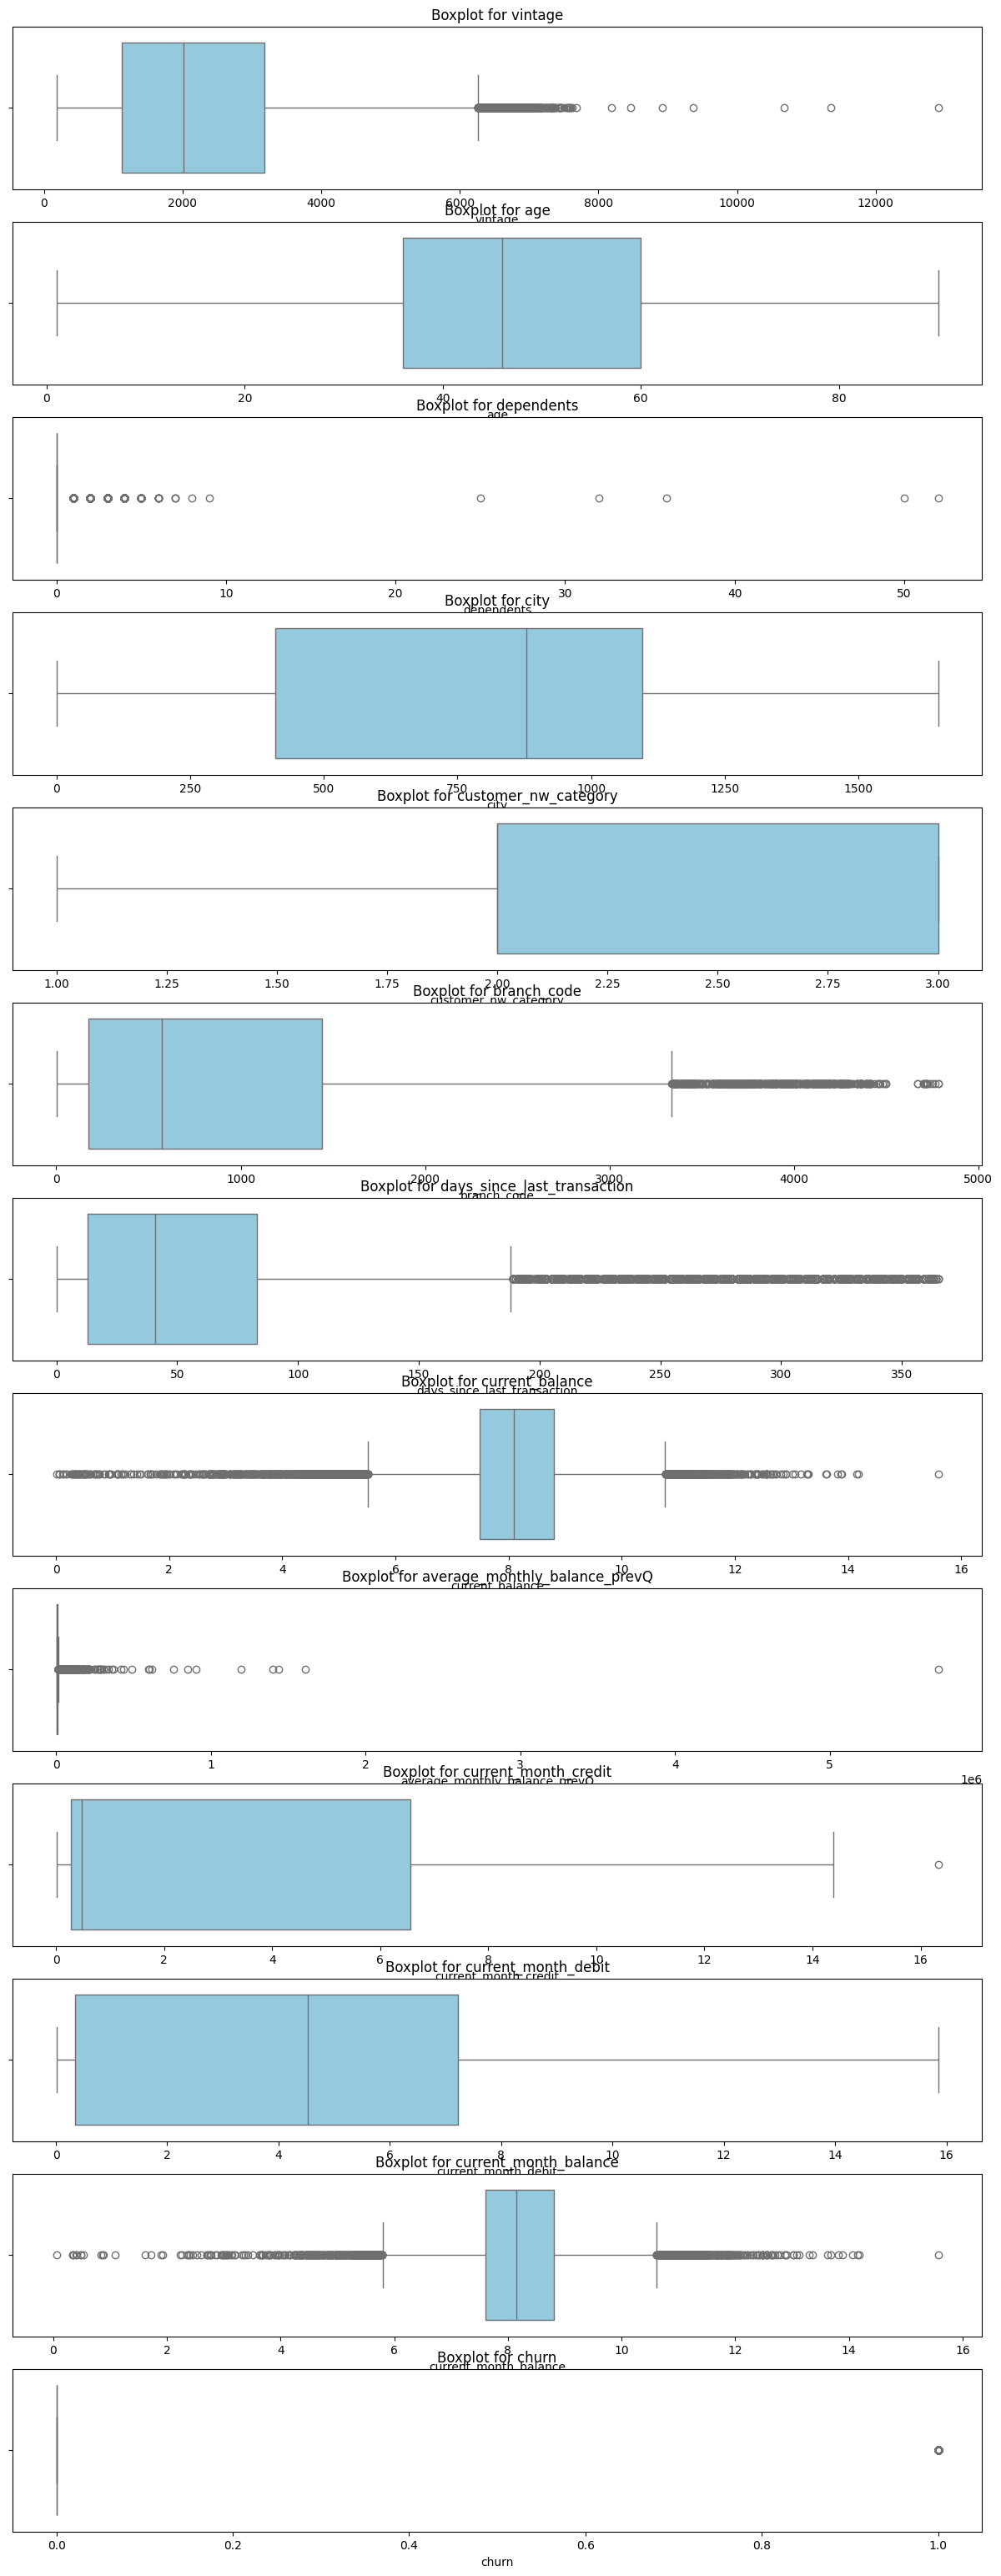

In [19]:
# checking for the outliers
# plot boxplots for each numerical columns
plt.figure(figsize = (15, len(numerical_cols)*3))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(x = df_churn[col], color = 'skyblue')
    plt.title(f'Boxplot for {col}')

plt.show()

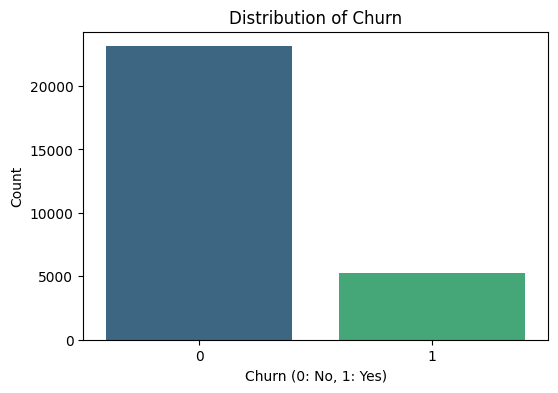


Percentage Distribution of Churn:


,proportion
churn,
0,81.467127
1,18.532873


In [20]:
# Distribution of target variable 'churn'
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df_churn, palette='viridis')
plt.title('Distribution of Churn')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

churn_distribution = df_churn['churn'].value_counts(normalize=True) * 100
print("\nPercentage Distribution of Churn:")
churn_distribution


Skewness of 'churn' variable: 1.6197


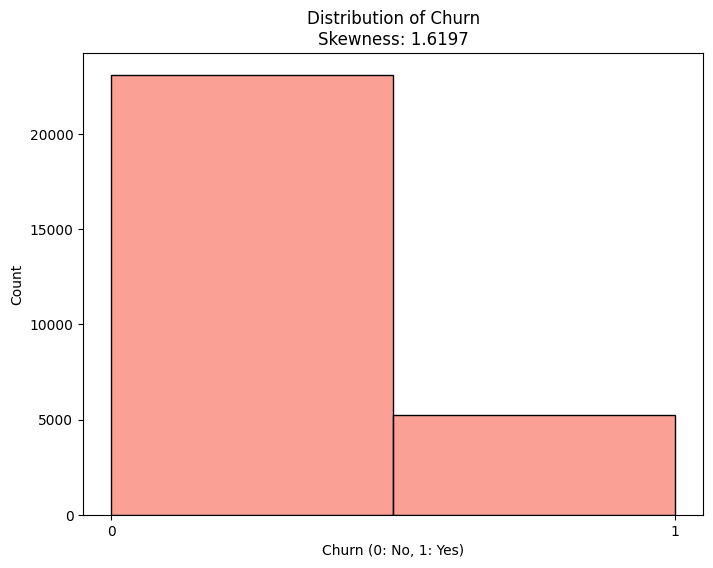

In [21]:
# Check skewness of the target variable 'churn'
churn_skew = df_churn['churn'].skew()
print(f"\nSkewness of 'churn' variable: {churn_skew:.4f}")

# Plot the distribution of the target variable 'churn' with skewness information
plt.figure(figsize=(8, 6))
sns.histplot(df_churn['churn'], bins=2, kde=False, color='salmon') # Use bins=2 for binary target
plt.title(f'Distribution of Churn\nSkewness: {churn_skew:.4f}')
plt.xlabel('Churn (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks([0, 1]) # Ensure x-axis labels are 0 and 1
plt.show()

**We can Clearly see that the target variable are imbalanced**

In [22]:
df_churn = df_churn.dropna()

In [23]:
df_churn.shape

(28364, 15)

# ENCODING

In [24]:
# Label Encode for 'gender'
df_churn['gender'] = df_churn['gender'].map({'Male': 1, 'Female': 0})

# One-Hot Encode for 'occupation' and droping the one column for removing the multicollinearity
df_churn = pd.get_dummies(df_churn, columns=['occupation'], drop_first=True)


**drop_first=True drops the first dummy column to avoid multicollinearity (dummy variable trap)**

In [25]:
df_churn.shape

(28364, 18)

In [26]:
df_churn_copy = df_churn.copy()

# Data Spliting

In [27]:
# Separating features (X) and target (y)
X = df_churn_copy.drop('churn', axis=1)  # Features
y = df_churn_copy['churn']  # Target variable

# random_state is set for reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                    random_state=42, stratify=y)

In [28]:
# Print the shapes of the resulting datasets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (19003, 17)
Shape of X_test: (9361, 17)
Shape of y_train: (19003,)
Shape of y_test: (9361,)


# Standard Scaling of numerical Data

In [29]:
# Initializing the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Defining and Training

In [30]:
model = LogisticRegression()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [31]:
# Predicting on the scaled test data
y_pred = model.predict(X_test_scaled)

# Model Evaluation

In [32]:
# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8408


In [33]:
# Displaying the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[7449  181]
 [1309  422]]


In [34]:
# Displaying the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      7630
           1       0.70      0.24      0.36      1731

    accuracy                           0.84      9361
   macro avg       0.78      0.61      0.64      9361
weighted avg       0.82      0.84      0.81      9361



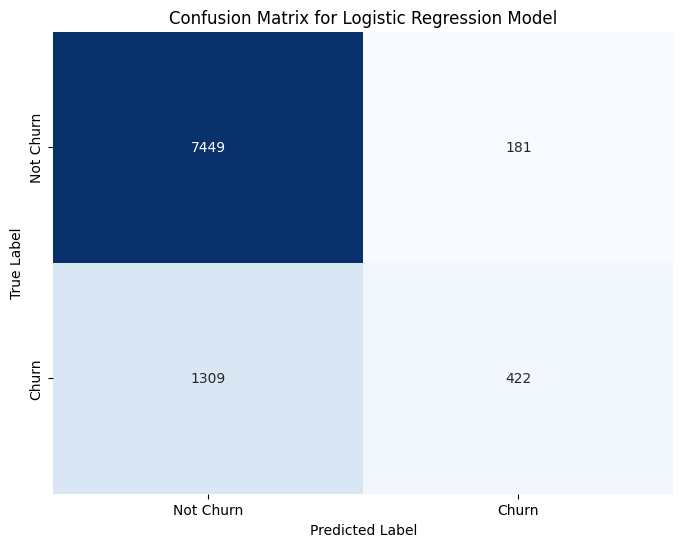

In [35]:
# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

# Handling class Imbalanced for the better accuracy

In [36]:
# Train logistic regression with class weights
model_balance = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model_balance.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [37]:
# Evaluate
y_pred_balanced = model_balance.predict(X_test_scaled)
y_probs_balanced = model_balance.predict_proba(X_test_scaled)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))

Confusion Matrix:
 [[6045 1585]
 [ 573 1158]]


In [38]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_balanced))


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.79      0.85      7630
           1       0.42      0.67      0.52      1731

    accuracy                           0.77      9361
   macro avg       0.67      0.73      0.68      9361
weighted avg       0.82      0.77      0.79      9361



In [39]:
print("\nROC AUC Score:", roc_auc_score(y_test, y_probs_balanced))


ROC AUC Score: 0.7807378821021039


# Using SMOTE technique for handling the unbalanced dataset


In [40]:
# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

# Train model
model_sm = LogisticRegression(max_iter=1000, random_state=42)
model_sm.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=1000, random_state=42)

In [41]:
# Predicting on the scaled test data using the SMOTE model
y_pred_smote = model_sm.predict(X_test_scaled)

# Displaying the confusion matrix for the SMOTE model
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
print("\nConfusion Matrix (SMOTE Model):")
print(conf_matrix_smote)


Confusion Matrix (SMOTE Model):
[[6041 1589]
 [ 574 1157]]


In [42]:
# Displaying the classification report for the SMOTE model
class_report_smote = classification_report(y_test, y_pred_smote)
print("\nClassification Report (SMOTE Model):")
print(class_report_smote)



Classification Report (SMOTE Model):
              precision    recall  f1-score   support

           0       0.91      0.79      0.85      7630
           1       0.42      0.67      0.52      1731

    accuracy                           0.77      9361
   macro avg       0.67      0.73      0.68      9361
weighted avg       0.82      0.77      0.79      9361



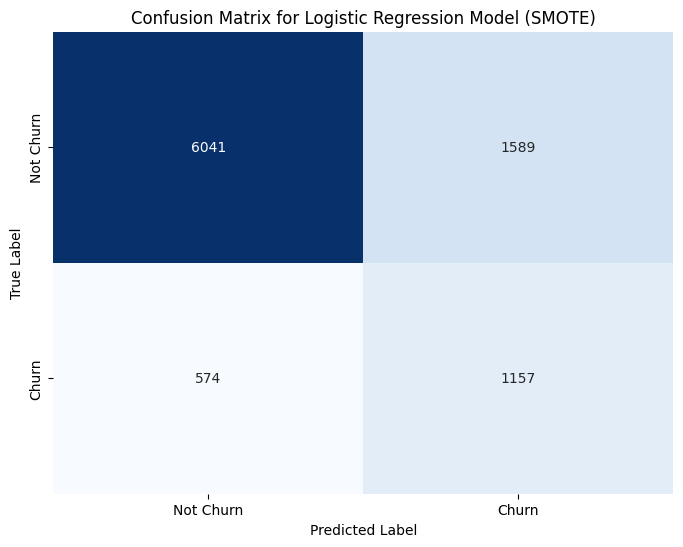

In [43]:
# Visualize the confusion matrix for the SMOTE model using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_smote, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression Model (SMOTE)')
plt.show()


In [44]:

# Calculate and print ROC AUC Score for the SMOTE model
y_probs_smote = model_sm.predict_proba(X_test_scaled)[:, 1]
print("\nROC AUC Score (SMOTE Model):", roc_auc_score(y_test, y_probs_smote))


ROC AUC Score (SMOTE Model): 0.77972974507724


# Moving towards the more Powerful model like Random Forest and XGBoost

In [45]:
#calculating the class weight manually
scale_pos_weight = (y_train == 0).sum()/ (y_train == 1).sum()

xgb_model = XGBClassifier(scale_pos_weight = scale_pos_weight, random_state = 42)
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [46]:
y_pred_xgb = xgb_model.predict(X_test_scaled)

y_probs_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

In [47]:
print("Confusion Matrix \n", confusion_matrix(y_test, y_pred_xgb))


Confusion Matrix 
 [[6738  892]
 [ 677 1054]]


In [48]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy of the model is: ", accuracy_xgb)

Accuracy of the model is:  0.8323897019549193


In [49]:
print('Classification Report: \n', classification_report(y_test, y_pred_xgb))


Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.88      0.90      7630
           1       0.54      0.61      0.57      1731

    accuracy                           0.83      9361
   macro avg       0.73      0.75      0.73      9361
weighted avg       0.84      0.83      0.84      9361



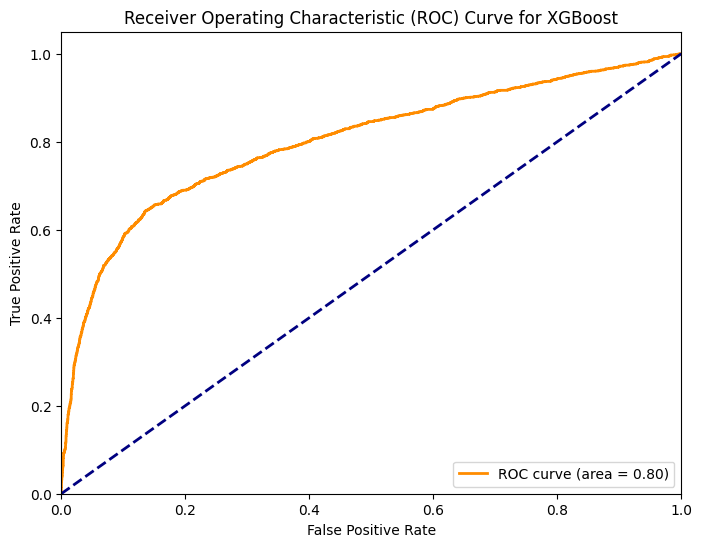

In [50]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_xgb)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()

# Logistic Regression Using UpWeight Technique

In [51]:
# compute sample weight(inverse of class frequence)
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

model_weight = LogisticRegression(max_iter=1000, random_state=42)
model_weight.fit(X_train_scaled, y_train, sample_weight=sample_weights)

LogisticRegression(max_iter=1000, random_state=42)

In [52]:
y_pred_weight = model_weight.predict(X_test_scaled)

y_probs_weight = model_weight.predict_proba(X_test_scaled)[:, 1]

In [53]:
print("Confusion Matrix \n", confusion_matrix(y_test, y_pred_weight))

Confusion Matrix 
 [[6045 1585]
 [ 573 1158]]


In [54]:
accuracy_weight = accuracy_score(y_test, y_pred_weight)
print("Accuracy of the model is: ", accuracy_weight)

Accuracy of the model is:  0.7694690738168999


In [55]:
print("Classification Report: \n",classification_report(y_test , y_pred_weight))

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.79      0.85      7630
           1       0.42      0.67      0.52      1731

    accuracy                           0.77      9361
   macro avg       0.67      0.73      0.68      9361
weighted avg       0.82      0.77      0.79      9361



# Random Forest


In [56]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [57]:
rf_pred = rf_model.predict(X_test_scaled)

rf_accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy of the model is: ", rf_accuracy)

Accuracy of the model is:  0.8603781647259908


In [58]:
print("Confusion Matrix: \n", confusion_matrix(y_test, rf_pred))

Confusion Matrix: 
 [[7312  318]
 [ 989  742]]


In [59]:
print("Classification Report: \n", classification_report(y_test, rf_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      7630
           1       0.70      0.43      0.53      1731

    accuracy                           0.86      9361
   macro avg       0.79      0.69      0.72      9361
weighted avg       0.85      0.86      0.85      9361



In [61]:
with open("Chustomer_churns_rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

print("Best model KNN saved as 'Chustomer_churns_rf_model.pkl'")

Best model KNN saved as 'Chustomer_churns_rf_model.pkl'
